In [1]:
#importing packages

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/big-mart-sales/Test-Set.csv
/kaggle/input/big-mart-sales/Train-Set.csv


In [2]:
df = pd.read_csv("/kaggle/input/big-mart-sales/Train-Set.csv")

## Getting the overview

In [3]:
# getting the first 5 rows

df.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# shape of the data

df.shape

(8523, 12)

In [5]:
# getting the overview 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Get categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Get numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['ProductID', 'FatContent', 'ProductType', 'OutletID', 'OutletSize', 'LocationType', 'OutletType']
Numerical Columns: ['Weight', 'ProductVisibility', 'MRP', 'EstablishmentYear', 'OutletSales']


In [7]:
# checking duplicate values

df.duplicated().sum()

0

In [8]:
# getting the percentage of null data

df.isnull().mean()*100

ProductID             0.000000
Weight               17.165317
FatContent            0.000000
ProductVisibility     0.000000
ProductType           0.000000
MRP                   0.000000
OutletID              0.000000
EstablishmentYear     0.000000
OutletSize           28.276428
LocationType          0.000000
OutletType            0.000000
OutletSales           0.000000
dtype: float64

## Handeling the null values

In [9]:
# weight is numerical so we can checking its mean

df['Weight'].mean()

12.857645184135976

In [10]:
# filling the missing weight column with mean value

df['Weight'] = df['Weight'].fillna(df['Weight'].mean())

In [11]:
# getting the outlet size categories

df["OutletSize"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [12]:
# as the outlet size is category , getting the mode of the outlet size

df['OutletSize'].mode()

0    Medium
Name: OutletSize, dtype: object

In [13]:
# filling the missing outletsize column with mode value

df['OutletSize'] = df['OutletSize'].fillna(df['OutletSize'].mode()[0])

In [14]:
# checking if the nulls are updated

df.isnull().mean()*100

ProductID            0.0
Weight               0.0
FatContent           0.0
ProductVisibility    0.0
ProductType          0.0
MRP                  0.0
OutletID             0.0
EstablishmentYear    0.0
OutletSize           0.0
LocationType         0.0
OutletType           0.0
OutletSales          0.0
dtype: float64

## Handeling the outliers

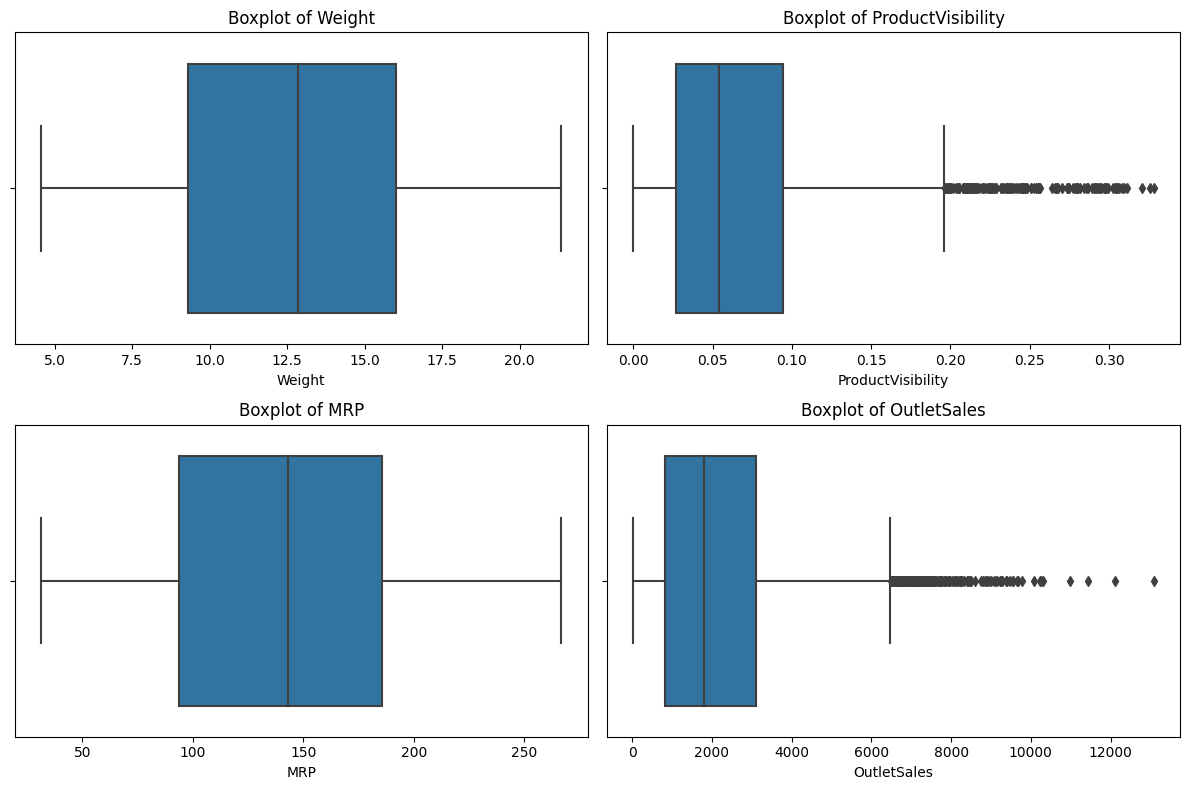

In [15]:
# checking for outliers

# List of numeric columns to visualize
numeric_cols = ['Weight', 'ProductVisibility', 'MRP', 'OutletSales']

# Plotting boxplots for each numeric column
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)  # Create a 2x2 subplot grid
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()